In [1]:
import os
import glob
import time
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
%%time
app_usage_trace = pd.read_csv("../data/0_source_data/App_usage_trace.zip",
                              compression='zip',
                              sep=' ',
                              names=['user_id', 'timestamp', 'base_station_id', 'app_id', 'traffic_bytes'],
#                               nrows=5000,
                              parse_dates=['timestamp']
                             )
app_usage_trace

CPU times: user 2min 52s, sys: 147 ms, total: 2min 52s
Wall time: 2min 52s


,user_id,timestamp,base_station_id,app_id,traffic_bytes
0,0,2016-04-20 08:13:19,8194,361,1920
1,0,2016-04-20 08:13:20,8194,361,1764
2,0,2016-04-20 08:13:22,8194,361,4434
3,0,2016-04-20 08:13:30,8194,361,703
4,0,2016-04-20 08:13:31,8194,361,1682
...,...,...,...,...,...
4171945,999,2016-04-26 22:19:17,413,5,2533
4171946,999,2016-04-26 22:19:21,413,5,1361
4171947,999,2016-04-26 22:20:26,413,5,1365
4171948,999,2016-04-26 22:34:13,413,5,1400


In [9]:
# Schema overview
df = app_usage_trace
for col in df.columns:
    
    print('=======================', col, '=======================')
    print('Unique values --> ', df[col].nunique())
    if (df[col].nunique() <= 30):
        print(df[col].unique())
        print('Distribution: ')
        print(df[col].value_counts())
    else:
        print(df[col].unique()[:5], '...')
    print()

======================= user_id =======================
Unique values -->  2
[0 1]
Distribution: 
0    3998
1    1002
Name: user_id, dtype: int64

======================= timestamp =======================
Unique values -->  4011
['2016-04-20T08:13:19.000000000' '2016-04-20T08:13:20.000000000'
 '2016-04-20T08:13:22.000000000' '2016-04-20T08:13:30.000000000'
 '2016-04-20T08:13:31.000000000'] ...

======================= base_station_id =======================
Unique values -->  101
[8194 8192 1906 1307 1847] ...

======================= app_id =======================
Unique values -->  125
[361  31 360 612   1] ...

======================= traffic_bytes =======================
Unique values -->  3329
[1920 1764 4434  703 1682] ...



In [10]:
user_0 = app_usage_trace[app_usage_trace['user_id']==0]

In [11]:
user_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3997
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          3998 non-null   int64         
 1   timestamp        3998 non-null   datetime64[ns]
 2   base_station_id  3998 non-null   int64         
 3   app_id           3998 non-null   int64         
 4   traffic_bytes    3998 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 187.4 KB


In [12]:
user_0

,user_id,timestamp,base_station_id,app_id,traffic_bytes
0,0,2016-04-20 08:13:19,8194,361,1920
1,0,2016-04-20 08:13:20,8194,361,1764
2,0,2016-04-20 08:13:22,8194,361,4434
3,0,2016-04-20 08:13:30,8194,361,703
4,0,2016-04-20 08:13:31,8194,361,1682
...,...,...,...,...,...
3993,0,2016-04-26 15:33:08,8194,361,11362
3994,0,2016-04-26 15:33:09,8194,361,1133
3995,0,2016-04-26 15:33:10,8194,361,10067
3996,0,2016-04-26 15:33:11,8194,361,3057


In [13]:
user_0.sort_values(by='timestamp')

,user_id,timestamp,base_station_id,app_id,traffic_bytes
0,0,2016-04-20 08:13:19,8194,361,1920
1,0,2016-04-20 08:13:20,8194,361,1764
2,0,2016-04-20 08:13:22,8194,361,4434
3,0,2016-04-20 08:13:30,8194,361,703
4,0,2016-04-20 08:13:31,8194,361,1682
...,...,...,...,...,...
3993,0,2016-04-26 15:33:08,8194,361,11362
3994,0,2016-04-26 15:33:09,8194,361,1133
3995,0,2016-04-26 15:33:10,8194,361,10067
3996,0,2016-04-26 15:33:11,8194,361,3057


In [14]:
user_0['base_station_id'].value_counts()

8194    583
7210    377
7549    305
2318    228
7049    206
6709    196
6561    176
8120    171
8368    164
6707    148
7548    142
2473     88
6708     87
1856     83
1758     71
9060     65
2366     63
8118     61
7209     60
8603     60
8370     57
6703     47
7718     46
7692     46
1959     42
7748     40
7704     28
3042     27
2571     25
1899     20
1765     19
7031     17
1361     17
2323     17
6897     16
2373     16
7714     14
1988     14
6537     13
1633     11
8192     11
1736     10
1611      9
2304      9
1906      9
7474      8
6554      8
6766      7
1763      7
3094      6
1883      6
7211      6
6575      5
8119      5
7713      5
6969      4
7333      4
2468      2
7129      2
2160      1
1737      1
1847      1
3416      1
2572      1
6767      1
2583      1
1307      1
1987      1
Name: base_station_id, dtype: int64

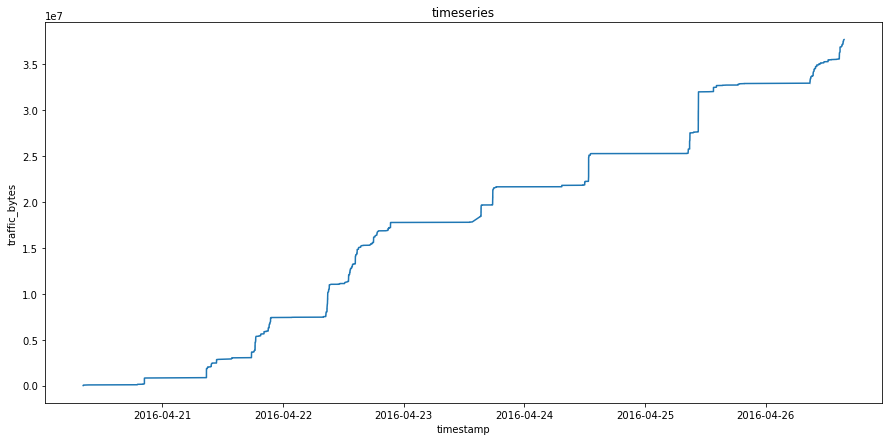

In [15]:
plt.figure(figsize=[15,7])
my_chart = sns.lineplot(x=user_0["timestamp"], y=user_0["traffic_bytes"].cumsum(), palette=["#682F2F", "#B9C0C9"],)
my_chart.set_title("timeseries")
plt.show()

DatetimeIndex(['2016-04-20 08:13:19', '2016-04-20 08:13:20', '2016-04-20 08:13:22', '2016-04-20 08:13:30', '2016-04-20 08:13:31', '2016-04-20 08:16:44', '2016-04-20 08:16:49', '2016-04-20 08:16:49', '2016-04-20 08:16:49', '2016-04-20 08:16:50',
               ...
               '2016-04-26 15:29:48', '2016-04-26 15:29:49', '2016-04-26 15:29:59', '2016-04-26 15:30:28', '2016-04-26 15:30:49', '2016-04-26 15:33:08', '2016-04-26 15:33:09', '2016-04-26 15:33:10', '2016-04-26 15:33:11', '2016-04-26 15:34:17'], dtype='datetime64[ns]', name='timestamp', length=3998, freq=None)

In [34]:
user_0['timestamp'] = pd.to_datetime(user_0['timestamp'], infer_datetime_format=True)

/home/abimael/miniconda3/envs/social_listening/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
user_0['timestamp'].drop_duplicates(inplace=True)

/home/abimael/miniconda3/envs/social_listening/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
test = user_0.set_index(['timestamp'])

In [30]:
# test = user_0[["timestamp", "traffic_bytes"]].set_index(pd.DatetimeIndex(user_0['timestamp'])).drop(columns=['timestamp'])

In [73]:
test.head(100)

,user_id,base_station_id,app_id,traffic_bytes
timestamp,,,,
2016-04-20 08:13:19,0,8194,361,1920
2016-04-20 08:13:20,0,8194,361,1764
2016-04-20 08:13:22,0,8194,361,4434
2016-04-20 08:13:30,0,8194,361,703
2016-04-20 08:13:31,0,8194,361,1682
2016-04-20 08:16:44,0,8194,361,1878
2016-04-20 08:16:49,0,8194,31,2156
2016-04-20 08:16:49,0,8194,360,1928
2016-04-20 08:16:49,0,8194,612,2393


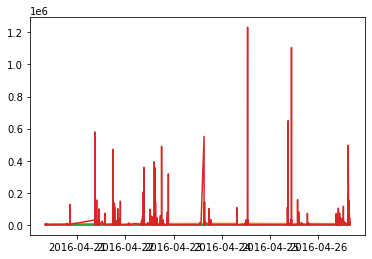

In [39]:
plt.plot(test)

In [43]:
len(test)

3998

In [67]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(test['traffic_bytes'], period = int(len(test)/2))

In [68]:
decomposition

In [69]:
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

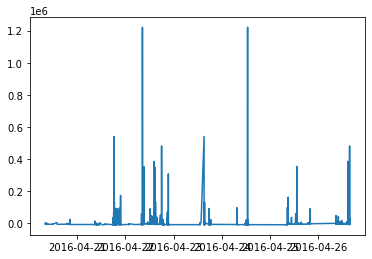

In [70]:
plt.plot(seasonal)

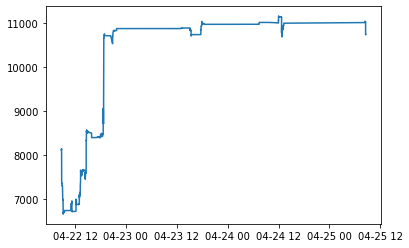

In [72]:
plt.plot(trend)